# Online Advertisement Evaluation for TVs

Let's evaluate some online ads options to pick the best one.

In [1]:
import json
import sys
sys.path.insert(0, '..')

import matplotlib.pyplot as plt

import tinytroupe
from tinytroupe.agent import TinyPerson
from tinytroupe.environment import TinyWorld
from tinytroupe.examples import create_lisa_the_data_scientist, create_oscar_the_architect
from tinytroupe.factory import TinyPersonFactory

from tinytroupe.extraction import ResultsExtractor


!!!!
DISCLAIMER: TinyTroupe relies on Artificial Intelligence (AI) models to generate content. 
The AI models are not perfect and may produce inappropriate or inacurate results. 
For any serious or consequential use, please review the generated content before using it.
!!!!

Looking for default config on: c:\Users\pdasilva\repos\TinyTroupe\examples\..\tinytroupe\utils\..\config.ini
Found custom config on: c:\Users\pdasilva\repos\TinyTroupe\examples\config.ini
TinyTroupe version: 0.5.1
Current date and time (local): 2025-07-15 21:15:48
Current date and time (UTC):   2025-07-16 00:15:48

Current TinyTroupe configuration 
[OpenAI]
api_type = openai
azure_api_version = 2024-08-01-preview
model = gpt-4o-mini
reasoning_model = o3-mini
embedding_model = text-embedding-3-small
max_tokens = 16000
temperature = 1.7
freq_penalty = 0.1
presence_penalty = 0.1
timeout = 480
max_attempts = 5
waiting_time = 0
exponential_backoff_factor = 5
reasoning_effort = high
cache_api_calls = False
cache_file_na

## Judging the best ad

Consider the following ads, obtained from real Bing queries.

In [2]:
# User search query: "55 inches tv"

# Ad targeting tech enthusiasts
tv_ad_1 =\
"""
The Ultimate Gaming Experience - LG 4K Ultra HD TV
https://www.lg.com/tv/oled
AdExperience Next-Level Gaming with LG's 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Response Time. Perfect for Gamers and Tech Enthusiasts.

Infinite Contrast · Self-Lighting OLED · Dolby Vision™ IQ · ThinQ AI w/ Magic Remote

Exclusive Gaming Features
LG G2 97" OLED evo TV
Free Gaming Stand w/ Purchase
World's No.1 OLED TV
"""

# Ad targeting families
tv_ad_2 =\
"""
The Perfect Family TV - Samsung 4K & 8K TVs
https://www.samsung.com
AdBring Your Family Together with Samsung's 4K & 8K TVs. Stunning Picture Quality and Family-Friendly Features. Ideal for Movie Nights and Family Gatherings.

Discover Samsung Event · Real Depth Enhancer · Anti-Reflection · 48 mo 0% APR Financing

The 2023 OLED TV Is Here
Samsung Neo QLED 4K TVs
Samsung Financing
Ranked #1 By The ACSI®

Perfect for Family Movie Nights
"""

# Ad targeting budget-conscious shoppers
tv_ad_3 =\
"""
Affordable 55 Inch TV - Wayfair Deals
Shop Now
https://www.wayfair.com/furniture/free-shipping
AdGet the Best Deals on 55 Inch TVs at Wayfair. High-Quality TVs at Budget-Friendly Prices. Free Shipping on All Orders Over $35.

Affordable Prices · Great Deals · Free Shipping
"""

Let's build a request for our agents to pick the best ad.

In [3]:
eval_request_msg = \
f"""
Can you evaluate these Bing ads for me? Which one convices you more to buy their particular offering? 
Select **ONLY** one. Please explain your reasoning, based on your financial situation, background and personality.

# AD 1
```
{tv_ad_1}
```

# AD 2
```
{tv_ad_2}
```

# AD 3
```
{tv_ad_3}
```
"""

print(eval_request_msg)


Can you evaluate these Bing ads for me? Which one convices you more to buy their particular offering? 
Select **ONLY** one. Please explain your reasoning, based on your financial situation, background and personality.

# AD 1
```

The Ultimate Gaming Experience - LG 4K Ultra HD TV
https://www.lg.com/tv/oled
AdExperience Next-Level Gaming with LG's 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Response Time. Perfect for Gamers and Tech Enthusiasts.

Infinite Contrast · Self-Lighting OLED · Dolby Vision™ IQ · ThinQ AI w/ Magic Remote

Exclusive Gaming Features
LG G2 97" OLED evo TV
Free Gaming Stand w/ Purchase
World's No.1 OLED TV

```

# AD 2
```

The Perfect Family TV - Samsung 4K & 8K TVs
https://www.samsung.com
AdBring Your Family Together with Samsung's 4K & 8K TVs. Stunning Picture Quality and Family-Friendly Features. Ideal for Movie Nights and Family Gatherings.

Discover Samsung Event · Real Depth Enhancer · Anti-Reflection · 48 mo 0% APR Financing

The 2023 OLED TV Is 

Let's also have a reason for them to require a new TV.

In [4]:
situation = "Your TV broke and you need a new one. You search for a new TV on Bing."

### Try with standard agents

To begin with, let's pick a pre-defined agent and ask him or her to perform the evaluations. To make it easier to change the chosen agent, we assign it to a variable first.

In [5]:
TinyPerson.all_agents

{}

In [6]:
lisa = create_lisa_the_data_scientist()

In [7]:
lisa.change_context(situation)

In [8]:
lisa.listen_and_act(eval_request_msg)

USER --> Lisa Carter: [CONVERSATION] 
          >  Can you evaluate these Bing ads for me? Which one convices you more to buy their
          > particular offering?  Select **ONLY** one. Please explain your reasoning, based on your
          > financial situation, background and personality.  # AD 1 ```  The Ultimate Gaming
          > Experience - LG 4K Ultra HD TV https://www.lg.com/tv/oled AdExperience Next-Level Gaming
          > with LG's 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Response Time. Perfect
          > for Gamers and Tech Enthusiasts.  Infinite Contrast · Self-Lighting OLED · Dolby Vision™
          > IQ · ThinQ AI w/ Magic Remote  Exclusive Gaming Features LG G2 97" OLED evo TV Free
          > Gaming Stand w/ Purchase World's No.1 OLED TV  ```  # AD 2 ```  The Perfect Family TV -
          > Samsung 4K & 8K TVs https://www.samsung.com AdBring Your Family Together with Samsung's
          > 4K & 8K TVs. Stunning Picture Quality and Family-Friendly Features. Ideal for Movie
          > Nights and Family Gatherings.  Discover Samsung Event · Real Depth Enhancer · Anti-
          > Reflection · 48 mo 0% APR Financing  The 2023 OLED TV Is Here Samsung Neo QLED 4K (...)

Lisa Carter acts: [THINK] 
                 > I need to evaluate the three ads based on my financial situation, background, and
                 > personality. I should consider which ad resonates with me the most and why. Ad 1
                 > focuses on gaming, which aligns with my interest in technology and high-quality
                 > visuals. Ad 2 emphasizes family gatherings, which is appealing but less relevant
                 > to my current lifestyle. Ad 3 offers affordability, which is important but lacks
                 > the excitement of the other two. I think I will lean towards Ad 1 because it
                 > highlights advanced technology and features that I find intriguing as a data
                 > scientist.

Lisa Carter acts: [TALK] 
                 > After evaluating the ads, I find that Ad 1 for the LG 4K Ultra HD TV convinces me
                 > the most. As a data scientist, I appreciate the emphasis on advanced technology
                 > and features like unmatched picture quality and ultra-fast response time, which
                 > are crucial for an immersive gaming experience. The exclusive gaming features and
                 > the free gaming stand also add value to the offering. While Ad 2 appeals to
                 > family gatherings, it doesn't resonate as much with my current lifestyle. Ad 3 is
                 > budget-friendly, but it lacks the excitement and quality that I seek in a TV.
                 > Therefore, I would choose Ad 1 for its technological appeal and features.

Lisa Carter acts: [DONE] 

Let's extract from the agent's interaction the best ad chosen. In this manner, we can easily process results later.

In [9]:
extractor = ResultsExtractor()

extraction_objective="Find the ad the agent chose. Extract the Ad number and title."

res = extractor.extract_results_from_agent(lisa, 
                          extraction_objective=extraction_objective,
                          situation=situation,
                          fields=["ad_number", "ad_title"],
                          verbose=True)

res

Extraction raw result message: {'content': '{"ad_number": "AD 1", "ad_title": "The Ultimate Gaming Experience - LG 4K Ultra HD TV"}', 'refusal': None, 'role': 'assistant', 'annotations': []}


{'ad_number': 'AD 1',
 'ad_title': 'The Ultimate Gaming Experience - LG 4K Ultra HD TV'}

We can then easily get the ad number and title from the results:

In [10]:
f"{res['ad_number']}: {res['ad_title']}"

'AD 1: The Ultimate Gaming Experience - LG 4K Ultra HD TV'

### Try with agents generated on the fly too

We don't really need to spend a lot of time customizing agents. We can create them on the fly from simple descriptions.

In [11]:
population_size = 30

In [12]:
factory = TinyPersonFactory.create_factory_from_demography("./information/populations/usa.json", 
                                                           population_size=population_size,
                                                           context=situation)

In [13]:
people = factory.generate_people(population_size, verbose=True)

Generated person 5/30: Eliot Running Wolf is a 67 year old Unemployed, American, currently living in A small town in rural Montana, USA. Eliot Running Wolf is a pragmatic individual who finds comfort in the simplicity of life, often seeking solace in nature through activities like fishing and hiking. His loyalty to family is unwavering, and he cherishes the time spent with his son, Jake, who provides support during challenging times. Despite his struggles with anxiety and financial concerns, Eliot maintains a strong sense of community, often engaging in local events and sharing stories from his past that reflect his values of hard work and resilience. He has a knack for home repair and woodworking, skills he enjoys utilizing in his spare time, while also finding joy in classic rock music that resonates with his experiences.
Generated person 1/30: Maya Chen is a 27 year old Educator, American, currently living in San Francisco, California. Maya Chen is not only dedicated to her role as 

In [14]:
target_audience = TinyWorld(f"Target audience", people, broadcast_if_no_target=False)
target_audience.broadcast(eval_request_msg)
target_audience.run(1)


USER --> Eliot Running Wolf: [CONVERSATION] 
          >  Can you evaluate these Bing ads for me? Which one convices you more to buy their
          > particular offering?  Select **ONLY** one. Please explain your reasoning, based on your
          > financial situation, background and personality.  # AD 1 ```  The Ultimate Gaming
          > Experience - LG 4K Ultra HD TV https://www.lg.com/tv/oled AdExperience Next-Level Gaming
          > with LG's 4K OLED TV. Unmatched Picture Quality and Ultra-Fast Response Time. Perfect
          > for Gamers and Tech Enthusiasts.  Infinite Contrast · Self-Lighting OLED · Dolby Vision™
          > IQ · ThinQ AI w/ Magic Remote  Exclusive Gaming Features LG G2 97" OLED evo TV Free
          > Gaming Stand w/ Purchase World's No.1 OLED TV  ```  # AD 2 ```  The Perfect Family TV -
          > Samsung 4K & 8K TVs https://www.samsung.com AdBring Your Family Together with Samsung's
          > 4K & 8K TVs. Stunning Picture Quality and Family-Friendly Features. Ideal for Movie
          > Nights and Family Gatherings.  Discover Samsung Event · Real Depth Enhancer · Anti-
          > Reflection · 48 mo 0% APR Financing  The 2023 OLED TV Is Here Samsung Neo QLED 4K (...)

       + --> Maya Chen

       + --> David Hargrove

       + --> ...others...

─────────────────────────────────────────── Target audience step 1 of 1 ───────────────────────────────────────────

Maya Chen acts: [THINK] 
               > I need to evaluate the ads based on my financial situation, background, and
               > personality. I should consider which ad resonates with me the most and why. I am
               > passionate about education and creativity, so I might lean towards something that
               > enhances family experiences or offers value for money. The LG ad seems appealing
               > for its advanced technology, but I also appreciate affordability. The Wayfair ad
               > might be the most relatable given my budget-conscious mindset. However, the Samsung
               > ad emphasizes family togetherness, which aligns with my values.

Jamal Anderson acts: [THINK] 
                    > I need to evaluate the ads based on my financial situation and preferences. I
                    > want a TV that fits my gaming interests and budget. The LG ad highlights
                    > features for gamers, which is appealing, but it's likely expensive. The
                    > Samsung ad focuses on family use, which isn't my priority. The Wayfair ad
                    > offers affordability, which is important since I'm currently unemployed and
                    > looking for budget-friendly options. I should lean towards the Wayfair ad for
                    > its affordability and practicality.

Eliot Running Wolf acts: [THINK] 
                        > Evaluating the ads, I need to consider my financial situation and
                        > preferences. The LG 4K Ultra HD TV ad is appealing due to its advanced
                        > features, but it's likely expensive. The Samsung ad emphasizes family,
                        > which resonates with me, but again, it might be out of my budget. The
                        > Wayfair ad stands out because it offers affordability and free shipping,
                        > which is crucial for someone like me who is currently unemployed and
                        > anxious about finances. I think I would choose the Wayfair ad for its
                        > budget-friendly approach and practicality.

Rebecca Sinclair acts: [THINK] 
                      > I need to evaluate the three ads based on my financial situation,
                      > background, and personality. I should consider which ad resonates with me
                      > the most and why. I have a family, so family-oriented features might appeal
                      > to me, but I also appreciate quality and technology. I should weigh the
                      > benefits of each ad carefully before making a decision.

Hana Kimura acts: [THINK] 
                 > I need to evaluate the ads based on my financial situation, background, and
                 > personality. I should consider which ad resonates with me the most and why. I am
                 > an elementary school teacher who values creativity and family time, so I might
                 > lean towards a family-oriented product. However, I also appreciate quality and
                 > technology, especially for educational purposes. I should weigh the features and
                 > benefits of each ad carefully before making a decision.

Charlotte Kensington acts: [THINK] 
                          > I need to evaluate the three ads based on my financial situation,
                          > background, and personality. I should consider which ad resonates with
                          > me the most and why. Ad 1 focuses on gaming, which I enjoy, but it might
                          > be expensive. Ad 2 emphasizes family gatherings, which aligns with my
                          > values, but I need to think about the cost. Ad 3 offers affordability,
                          > which is appealing given my budget constraints. I should weigh these
                          > factors carefully before making a decision.

Walter Grayson acts: [THINK] 
                    > I need to evaluate the ads based on my financial situation and personality. I
                    > have to consider which ad resonates with me the most, taking into account my
                    > values and preferences. I tend to prioritize affordability and practicality,
                    > especially since I often worry about finances. The LG ad seems appealing for
                    > its advanced features, but it might be too expensive for me. The Samsung ad
                    > emphasizes family, which I value, but it doesn't mention affordability. The
                    > Wayfair ad focuses on budget-friendly options, which aligns with my financial
                    > concerns. I think I will choose the Wayfair ad as it offers a good balance of
                    > quality and price, which is important for my current situation.

Margaret Ellison acts: [THINK] 
                      > I need to evaluate the three ads based on my financial situation,
                      > background, and personality. I should consider which ad resonates with me
                      > the most and why. I have a family, so family-oriented products might appeal
                      > to me, but I also appreciate quality and technology. The LG ad emphasizes
                      > gaming, which is not my primary focus, while the Samsung ad highlights
                      > family features, which I value. The Wayfair ad offers affordability, which
                      > is important given my budget. I should weigh these factors carefully before
                      > making a decision.

Gabriela Mendoza-Rivera acts: [THINK] 
                             > I need to evaluate the three ads based on my financial situation,
                             > background, and personality. I should consider which ad resonates
                             > with me the most and why. I have a strong interest in technology and
                             > enjoy gaming, but I also value family time and budget-friendly
                             > options. I should weigh the features and benefits of each ad
                             > carefully before making a decision.

Jessica Harrington acts: [THINK] 
                        > I need to evaluate the three ads based on my financial situation,
                        > background, and personality. I should consider which ad resonates with me
                        > the most and why. I have a family, so family-oriented features might
                        > appeal to me, but I also appreciate quality and technology. I should weigh
                        > the benefits of each ad carefully before making a decision.

David Hargrove acts: [THINK] 
                    > I need to evaluate the ads based on my financial situation and personality. I
                    > have to consider which ad would appeal to me the most given my values and
                    > current circumstances. I tend to prioritize practicality and affordability,
                    > especially since I worry about finances. The LG TV ad seems appealing for its
                    > features, but it might be too expensive. The Samsung ad emphasizes family,
                    > which resonates with me, but again, it could be pricey. The Wayfair ad stands
                    > out because it offers affordability and free shipping, which aligns with my
                    > financial concerns. I think I would choose the Wayfair ad for its budget-
                    > friendly approach.

Aiko Tanaka acts: [THINK] 
                 > I need to evaluate the three ads based on my financial situation, background, and
                 > personality. I should consider which ad resonates with me the most and why. I am
                 > an elementary school teacher who values creativity and family, so I might lean
                 > towards something that reflects those values. The LG ad focuses on gaming, which
                 > isn't my primary interest. The Samsung ad emphasizes family gatherings, which
                 > aligns with my values. The Wayfair ad offers affordability, which is important
                 > given my budget. I should choose the Samsung ad because it promotes family
                 > togetherness, which is something I cherish.

Jamal Anderson acts: [TALK] 
                    > I think I would choose the Wayfair ad for the affordable 55 Inch TV. Since I'm
                    > currently unemployed, budget-friendly options are really important to me. The
                    > Wayfair ad emphasizes high-quality TVs at lower prices, which fits my
                    > financial situation better than the LG or Samsung ads that focus on premium
                    > features and family use. Plus, free shipping is a nice bonus!

Walter Grayson acts: [TALK] 
                    > I would choose the Wayfair ad for the affordable 55 Inch TV. It resonates with
                    > me because it emphasizes budget-friendly prices, which is important given my
                    > financial situation. I appreciate high-quality products, but I also need to be
                    > mindful of my spending. The other ads, while appealing in terms of features
                    > and family focus, may not align with my current financial priorities. The
                    > Wayfair ad offers a practical solution that fits my needs.

Eliot Running Wolf acts: [TALK] 
                        > I would choose the Wayfair ad for the affordable 55 Inch TV. Given my
                        > current financial situation, it's important for me to find budget-friendly
                        > options. The LG and Samsung ads look great, but they likely come with high
                        > prices that I can't afford right now. The Wayfair ad emphasizes quality at
                        > a lower price, which is more appealing to me.

Maya Chen acts: [THINK] 
               > After considering the ads, I realize that the Samsung ad resonates with me the
               > most. It emphasizes family togetherness, which is important to me as I value
               > spending quality time with loved ones. The features mentioned, like stunning
               > picture quality and family-friendly aspects, align with my interests in creating
               > engaging experiences. While the LG ad offers advanced technology, it feels more
               > geared towards individual gamers rather than family use. The Wayfair ad, although
               > budget-friendly, doesn't evoke the same emotional connection. Therefore, I would
               > choose the Samsung ad for its focus on family.

Hana Kimura acts: [THINK] 
                 > After considering the ads, I realize that AD 2, the Samsung 4K & 8K TVs,
                 > resonates with me the most. As an elementary school teacher, I value family time
                 > and creating memorable experiences. The emphasis on family-friendly features and
                 > movie nights aligns with my belief that education and entertainment can go hand
                 > in hand. Additionally, the stunning picture quality and financing options make it
                 > appealing for someone who might be budget-conscious but still wants quality. I
                 > appreciate that it promotes togetherness, which is important to me.

David Hargrove acts: [TALK] 
                    > I would choose the Wayfair ad for the Affordable 55 Inch TV. It appeals to me
                    > because it emphasizes budget-friendly prices and free shipping, which is
                    > important given my financial situation. I tend to prioritize practicality and
                    > affordability, especially since I worry about finances. The other ads, while
                    > they have great features, might be too expensive for me right now. The Wayfair
                    > ad aligns with my values of being responsible with money while still wanting a
                    > good quality TV for my family.

Margaret Ellison acts: [THINK] 
                      > After considering the three ads, I find that the Samsung 4K & 8K TVs ad
                      > resonates with me the most. It emphasizes family togetherness, which aligns
                      > with my values as a mother who enjoys family movie nights. The stunning
                      > picture quality and family-friendly features appeal to me, as I want to
                      > create enjoyable experiences for my family. Additionally, the financing
                      > option makes it more accessible given my budget constraints. Overall, this
                      > ad speaks to my desire for quality family time and aligns with my financial
                      > situation.

Jessica Harrington acts: [THINK] 
                        > After considering the ads, I realize that the Samsung 4K & 8K TV ad
                        > resonates with me the most. It emphasizes family-friendly features and the
                        > idea of bringing my family together for movie nights, which aligns with my
                        > values as a mother. The stunning picture quality and financing options
                        > also appeal to my practical side, as I want to make a smart financial
                        > decision while ensuring quality for my family.

Rebecca Sinclair acts: [THINK] 
                      > After considering the three ads, I find that the Samsung 4K & 8K TVs ad
                      > resonates with me the most. It emphasizes family-friendly features and the
                      > idea of bringing the family together for movie nights, which aligns with my
                      > values of family being the most important aspect of life. Additionally, the
                      > stunning picture quality and financing options make it appealing given my
                      > financial situation. While I appreciate the technology in the LG ad, the
                      > Samsung ad's focus on family gatherings is more compelling for me.

Aiko Tanaka acts: [TALK] 
                 > I would choose the Samsung ad for the 4K & 8K TVs. It emphasizes family
                 > togetherness, which is really important to me as an elementary school teacher. I
                 > believe that spending quality time with family is essential, and this ad
                 > highlights that aspect perfectly. Plus, the stunning picture quality and family-
                 > friendly features make it ideal for movie nights, which I love. While the LG ad
                 > focuses on gaming, and the Wayfair ad is about affordability, the Samsung ad
                 > resonates with my values of creativity and connection with loved ones.

Charlotte Kensington acts: [THINK] 
                          > After considering the three ads, I realize that Ad 2, the Samsung 4K &
                          > 8K TVs, resonates with me the most. It emphasizes family gatherings and
                          > movie nights, which aligns with my values of family being the most
                          > important aspect of life. While Ad 1 is appealing for its gaming
                          > features, it may not be the best fit for my current financial situation.
                          > Ad 3 offers affordability, but it lacks the emotional connection that Ad
                          > 2 provides. Therefore, I believe Ad 2 is the most convincing for me.

Gabriela Mendoza-Rivera acts: [THINK] 
                             > After considering the three ads, I find that AD 1, the LG 4K Ultra HD
                             > TV, convinces me the most. As a marketing specialist, I appreciate
                             > the emphasis on technology and features that cater to gamers and tech
                             > enthusiasts. The unmatched picture quality and ultra-fast response
                             > time are appealing, especially since I enjoy gaming. However, I also
                             > recognize the importance of family time, which makes AD 2 appealing
                             > as well. But given my current financial situation, I am more inclined
                             > towards investing in a high-quality product that enhances my gaming
                             > experience. AD 3 is budget-friendly, but it lacks the advanced
                             > features that I value. Therefore, AD 1 stands out to me as the best
                             > option.

Walter Grayson acts: [DONE] 

Jamal Anderson acts: [DONE] 

Eliot Running Wolf acts: [DONE] 

David Hargrove acts: [DONE] 

Aiko Tanaka acts: [DONE] 

Maya Chen acts: [TALK] 
               > I would choose the Samsung ad as the most convincing. It emphasizes family
               > togetherness, which is really important to me. The features like stunning picture
               > quality and family-friendly aspects align with my values of creating engaging
               > experiences with loved ones. While the LG ad has advanced technology, it feels more
               > focused on individual gamers rather than family use. The Wayfair ad is budget-
               > friendly, but it doesn't evoke the same emotional connection for me.

Hana Kimura acts: [TALK] 
                 > I would choose AD 2, the Samsung 4K & 8K TVs. It emphasizes family-friendly
                 > features and movie nights, which resonate with my values as a teacher who values
                 > creativity and family time. The stunning picture quality and financing options
                 > also make it appealing for someone who is budget-conscious but still wants
                 > quality. Overall, it promotes togetherness, which is important to me.

Jessica Harrington acts: [TALK] 
                        > I believe the Samsung 4K & 8K TV ad is the most convincing for me. It
                        > highlights family-friendly features and the importance of bringing my
                        > family together for movie nights, which resonates with my values as a
                        > mother. The stunning picture quality and financing options also make it a
                        > practical choice for my financial situation.

Margaret Ellison acts: [TALK] 
                      > I believe the Samsung 4K & 8K TVs ad is the most convincing for me. It
                      > emphasizes family togetherness, which is important to me as I enjoy family
                      > movie nights. The stunning picture quality and family-friendly features
                      > really appeal to my values. Plus, the financing option makes it more
                      > accessible given my budget. Overall, it aligns perfectly with what I look
                      > for in a TV.

Rebecca Sinclair acts: [TALK] 
                      > I have evaluated the ads, and I believe the Samsung 4K & 8K TVs ad is the
                      > most convincing for me. It emphasizes family-friendly features and the idea
                      > of bringing everyone together for movie nights, which aligns with my values.
                      > The stunning picture quality and financing options also make it appealing
                      > given my financial situation. While the LG ad highlights advanced
                      > technology, the focus on family in the Samsung ad resonates more with my
                      > lifestyle.

Charlotte Kensington acts: [TALK] 
                          > I believe the Samsung 4K & 8K TV ad is the most convincing for me. It
                          > emphasizes family gatherings and movie nights, which aligns with my
                          > values of family being the most important aspect of life. While the LG
                          > ad is appealing for its gaming features, it may not fit my current
                          > financial situation as well. The Wayfair ad offers affordability, but it
                          > lacks the emotional connection that the Samsung ad provides. Overall, I
                          > feel that the Samsung ad resonates with my priorities and lifestyle.

Gabriela Mendoza-Rivera acts: [TALK] 
                             > I believe AD 1, the LG 4K Ultra HD TV, is the most convincing for me.
                             > It highlights features that cater to gamers and tech enthusiasts,
                             > which aligns with my interests. The unmatched picture quality and
                             > ultra-fast response time are particularly appealing, especially since
                             > I enjoy gaming. While AD 2 is great for family time, I feel that
                             > investing in a high-quality product like the LG TV would enhance my
                             > gaming experience more. AD 3 is budget-friendly, but it lacks the
                             > advanced features I value. Overall, AD 1 stands out as the best
                             > option for me.

Harold Jenkins acts: [TALK] 
                    > I would choose AD 2, the Samsung 4K & 8K TVs. My reasoning is based on my
                    > family-oriented values and the importance of spending quality time together.
                    > The ad emphasizes family-friendly features and movie nights, which resonate
                    > with me as I enjoy gathering with my family for entertainment. Additionally,
                    > the financing option is appealing given my current financial situation, as it
                    > allows for more manageable payments. Overall, this ad aligns with my
                    > priorities and lifestyle better than the others.

Maya Chen acts: [DONE] 

Dorothy Mayfield acts: [THINK] 
                      > I need to evaluate the ads based on my financial situation and preferences.
                      > I have limited income, so affordability is crucial. I also value community
                      > and family, which makes me lean towards options that emphasize those
                      > aspects. The LG ad seems appealing for its technology, but I might not be
                      > able to afford it. The Samsung ad highlights family gatherings, which
                      > resonates with me, but it might be expensive too. The Wayfair ad focuses on
                      > affordability, which is important for me, but it lacks the emotional
                      > connection of family. I should choose the Wayfair ad for its budget-friendly
                      > approach, as I need to be practical with my finances.

Eugene Little Feather acts: [THINK] 
                           > Evaluating the ads based on my financial situation and personality, I
                           > need to consider what would be most practical for me. The LG 4K Ultra
                           > HD TV ad is appealing with its advanced features, but it's likely
                           > expensive and I can't afford high-end electronics right now. The
                           > Samsung ad emphasizes family, which resonates with my values, but
                           > again, it might be out of my budget. The Wayfair ad stands out because
                           > it offers affordable options, which is crucial given my financial
                           > constraints. I appreciate the practicality of getting a good deal
                           > without breaking the bank. Therefore, I think the Wayfair ad is the
                           > most convincing for me.

Hana Kimura acts: [DONE] 

Valentina Cruz acts: [TALK] 
                    > I would choose AD 1, the LG 4K Ultra HD TV. As a marketing specialist, I
                    > appreciate the emphasis on high-quality features that appeal to tech
                    > enthusiasts and gamers. The unmatched picture quality and ultra-fast response
                    > time are compelling selling points for someone who values performance in
                    > gaming. Additionally, the exclusive gaming features and the free gaming stand
                    > add extra value, making it a more attractive option for someone like me who
                    > enjoys immersive experiences. My financial situation allows for a higher
                    > investment in quality tech products, and I believe this TV would enhance my
                    > gaming and viewing experience significantly.

Lucia Torres acts: [THINK] 
                  > I need to evaluate the three ads based on my financial situation, background,
                  > and personality. I should consider which ad resonates with me the most and why.
                  > Ad 1 focuses on gaming, which aligns with my interest in technology and high-
                  > quality experiences. Ad 2 emphasizes family gatherings, which is appealing but
                  > not as relevant to me personally. Ad 3 offers affordability, which is important
                  > given my budget constraints. However, I value quality over price when it comes
                  > to technology. I think I will lean towards Ad 1 because it highlights features
                  > that excite me as a tech enthusiast.

Jessica Harrington acts: [DONE] 

Margaret Ellison acts: [DONE] 

Charlotte Kensington acts: [DONE] 

Rebecca Sinclair acts: [DONE] 

Gabriela Mendoza-Rivera acts: [DONE] 

Harold Jenkins acts: [DONE] 

Eugene Little Feather acts: [TALK] 
                           > I think the Wayfair ad is the most convincing for me. It emphasizes
                           > affordability and offers high-quality TVs at budget-friendly prices,
                           > which is important given my financial situation. I can't really afford
                           > high-end options like the LG or Samsung TVs right now, so the Wayfair
                           > deal seems like the best choice for someone in my position.

Dorothy Mayfield acts: [TALK] 
                      > I think I would choose the Wayfair ad for the affordable 55 Inch TV. Given
                      > my financial situation, it's important for me to find something budget-
                      > friendly. While the LG and Samsung ads have appealing features, they seem
                      > too expensive for me right now. The Wayfair ad emphasizes great deals and
                      > free shipping, which is a big plus. I appreciate that it focuses on
                      > affordability, as I want to make sure I can manage my expenses while still
                      > enjoying a good television.

Clara Windwalker acts: [THINK] 
                      > I need to evaluate the ads based on my financial situation, background, and
                      > personality. I have a limited budget as a retiree, and I value practicality
                      > and family-oriented products. I also appreciate quality but must consider
                      > affordability. The LG ad focuses on gaming, which doesn't align with my
                      > interests. The Samsung ad emphasizes family gatherings, which resonates with
                      > me, but it may be more expensive. The Wayfair ad offers affordability, which
                      > is appealing, but I need to consider the quality of the TV. I think I will
                      > lean towards the Samsung ad for its family focus, but I need to weigh the
                      > options carefully.

Malik Thompson acts: [THINK] 
                    > I need to evaluate the ads based on my financial situation and personality. I
                    > should consider which ad resonates with me the most given my current
                    > unemployment and desire for affordable options. The LG ad seems appealing for
                    > its gaming features, but it's likely out of my budget. The Samsung ad focuses
                    > on family, which isn't my priority right now. The Wayfair ad highlights
                    > affordability, which aligns with my financial situation. I think I will choose
                    > the Wayfair ad as it offers a budget-friendly option that fits my current
                    > needs.

Valentina Cruz acts: [DONE] 

Mabel Running Deer acts: [THINK] 
                        > I need to evaluate the ads based on my financial situation, background,
                        > and personality. I have a limited budget, so affordability is important. I
                        > also value family time and community, which might influence my choice. The
                        > LG ad seems appealing for its technology, but I might not be able to
                        > afford it. The Samsung ad emphasizes family gatherings, which resonates
                        > with me, but it might be expensive too. The Wayfair ad offers
                        > affordability, which is crucial for me, but it lacks the emotional appeal
                        > of family. I should choose the ad that balances quality and price while
                        > considering my values.

Javier Mendoza acts: [THINK] 
                    > I need to evaluate the ads based on my financial situation and personality. I
                    > have limited funds and I'm currently unemployed, so I should focus on
                    > affordability. The Wayfair ad seems appealing because it emphasizes budget-
                    > friendly prices and free shipping, which aligns with my current financial
                    > constraints. The LG and Samsung ads, while they offer great features, are
                    > likely out of my price range. I should choose the Wayfair ad as it fits my
                    > needs better.

Lucia Torres acts: [TALK] 
                  > After evaluating the ads, I would choose Ad 1: "The Ultimate Gaming Experience -
                  > LG 4K Ultra HD TV." As a marketing specialist and a tech enthusiast, I
                  > appreciate the focus on high-quality features like unmatched picture quality and
                  > ultra-fast response time, which are crucial for gaming. The exclusive gaming
                  > features and the free gaming stand also add value. While Ad 2 emphasizes family
                  > gatherings, which is nice, it doesn't resonate with my personal interests as
                  > much as the LG ad does. Ad 3 is affordable, but I prioritize quality in
                  > technology purchases. Therefore, Ad 1 is the most convincing for me.

Carlos Mendoza-Sanchez acts: [THINK] 
                            > I need to evaluate the ads based on my financial situation and
                            > personality. I should consider which ad appeals to me the most and
                            > why. Given my current unemployment status, I should lean towards
                            > affordability. The Wayfair ad seems to offer budget-friendly options,
                            > which aligns with my financial constraints. The LG and Samsung ads,
                            > while appealing in terms of features, are likely out of my price
                            > range. I should focus on the Wayfair ad as it emphasizes affordability
                            > and free shipping, which is important for me right now.

Ruth Ann Whitefeather acts: [THINK] 
                           > I need to evaluate the ads based on my financial situation, background,
                           > and personality. I have a limited budget and prefer affordable options.
                           > I also value family time and community, which might influence my
                           > choice. The LG ad seems appealing for its technology, but I might not
                           > be able to afford it. The Samsung ad emphasizes family, which resonates
                           > with me, but it might be expensive too. The Wayfair ad offers
                           > affordability, which is important to me, but it lacks the family
                           > aspect. I should choose the ad that aligns best with my values and
                           > financial situation.

Clara Windwalker acts: [TALK] 
                      > After evaluating the ads, I would choose the Samsung 4K & 8K TV ad. It
                      > emphasizes family gatherings and movie nights, which are important to me as
                      > I value spending time with my family. While it may be more expensive, the
                      > financing option makes it more accessible. The quality of the picture and
                      > family-friendly features resonate with my lifestyle, making it a more
                      > appealing choice than the others.

Eli Red Hawk acts: [THINK] 
                  > I need to evaluate the ads based on my financial situation and preferences. I
                  > prefer practical and budget-friendly options, especially since I'm cautious
                  > about spending. The Wayfair ad seems appealing because it emphasizes
                  > affordability and free shipping, which aligns with my values of financial
                  > stability and simplicity. The LG and Samsung ads, while they offer advanced
                  > features, might be too expensive for me right now. I should focus on the Wayfair
                  > ad as it fits my current needs better.

Malik Thompson acts: [TALK] 
                    > I would choose the Wayfair ad for the affordable 55 Inch TV. Given my current
                    > financial situation, it's important for me to find budget-friendly options.
                    > The LG and Samsung ads look great, but they seem too expensive for me right
                    > now. The Wayfair ad highlights high-quality TVs at budget-friendly prices,
                    > which is exactly what I need. Plus, the free shipping is a nice bonus!

Eugene Little Feather acts: [DONE] 

Dorothy Mayfield acts: [DONE] 

Lucia Torres acts: [DONE] 

Diego Ramirez acts: [THINK] 
                   > I need to evaluate the ads based on my financial situation and personality. I
                   > have limited funds and I'm currently unemployed, so I should lean towards
                   > something affordable. The Wayfair ad seems appealing because it emphasizes
                   > budget-friendly prices and free shipping, which aligns with my current
                   > financial constraints. The LG and Samsung ads, while they offer great features,
                   > are likely out of my price range right now. I should focus on practicality and
                   > affordability.

Emily Johnson acts: [THINK] 
                   > I need to evaluate the ads based on my financial situation, background, and
                   > personality. I should consider which ad resonates with me the most and why. I
                   > have a preference for family-oriented products, but I also appreciate quality
                   > and value for money. The LG ad emphasizes gaming features, which might not be
                   > my priority. The Samsung ad highlights family gatherings, which aligns with my
                   > values. The Wayfair ad focuses on affordability, which is appealing given my
                   > budget constraints. I should choose the Samsung ad as it combines quality and
                   > family appeal.

Clara Windwalker acts: [DONE] 

Mabel Running Deer acts: [TALK] 
                        > After considering the ads, I would choose the Wayfair ad for the
                        > Affordable 55 Inch TV. My financial situation is a priority, and this ad
                        > emphasizes budget-friendly prices, which is important for me. While the LG
                        > and Samsung ads highlight advanced technology and family features, they
                        > likely come with a higher price tag that I can't afford right now. The
                        > Wayfair ad's focus on affordability aligns with my values of being
                        > resourceful and practical, especially as I want to maintain my
                        > independence and manage my expenses wisely.

Malik Thompson acts: [DONE] 

Javier Mendoza acts: [TALK] 
                    > I think the ad that convinces me the most is the one from Wayfair for the
                    > affordable 55 Inch TV. Given my current financial situation, being unemployed
                    > and looking for budget-friendly options, this ad stands out to me. It
                    > emphasizes high-quality TVs at budget-friendly prices and offers free
                    > shipping, which is a big plus. The LG and Samsung ads, while they have great
                    > features, are likely too expensive for me right now. So, I would definitely go
                    > with Wayfair's offer.

Carlos Mendoza-Sanchez acts: [TALK] 
                            > I think the ad that convinces me the most is the Wayfair Deals ad for
                            > the affordable 55 Inch TV. Given my current financial situation, being
                            > unemployed, I need to focus on budget-friendly options. The emphasis
                            > on high-quality TVs at affordable prices and free shipping is really
                            > appealing to me. The LG and Samsung ads, while they have great
                            > features, are likely out of my price range right now. So, I would
                            > definitely go with Wayfair for a more practical choice.

Eli Red Hawk acts: [TALK] 
                  > I think the ad that convinces me the most is the Wayfair Deals ad for the
                  > affordable 55 Inch TV. It emphasizes budget-friendly prices and free shipping,
                  > which aligns with my cautious financial situation. I prefer practical options
                  > that won't strain my budget, and this ad seems to offer just that. The LG and
                  > Samsung ads, while they have impressive features, are likely out of my price
                  > range right now. So, I would go with Wayfair for a good deal.

Ruth Ann Whitefeather acts: [TALK] 
                           > I think I would choose the Wayfair ad for the affordable 55 Inch TV.
                           > Given my financial situation, it's important for me to find a budget-
                           > friendly option. While the LG and Samsung ads highlight impressive
                           > technology and family features, they likely come with a higher price
                           > tag that I can't afford right now. The Wayfair ad emphasizes great
                           > deals and free shipping, which is appealing to me as I want to make a
                           > smart purchase without overspending. Plus, I can still enjoy watching
                           > TV with my family without breaking the bank.

Mabel Running Deer acts: [DONE] 

Emily Johnson acts: [TALK] 
                   > I would choose the Samsung 4K & 8K TV ad. It emphasizes family-friendly
                   > features and quality, which resonates with my values of bringing family
                   > together. The idea of having a stunning picture quality for family movie nights
                   > is appealing, and the financing option makes it more accessible given my
                   > financial situation. Overall, it aligns well with my personality and
                   > priorities.

Jamal Carter acts: [TALK] 
                  > I think I would choose AD 3, the Affordable 55 Inch TV from Wayfair. Given my
                  > current financial situation, I'm really looking for budget-friendly options, and
                  > this ad emphasizes affordability and free shipping, which is appealing to me.
                  > The other ads, while they offer great features, are likely out of my price range
                  > right now. Plus, I don't need a super high-end TV; I just want something decent
                  > for gaming and watching streams. So, AD 3 seems like the best fit for me.

Diego Ramirez acts: [TALK] 
                   > I think the ad that convinces me the most is AD 3, the Affordable 55 Inch TV
                   > from Wayfair. Given my current financial situation, being unemployed and
                   > looking for budget-friendly options, this ad stands out to me. It emphasizes
                   > high-quality TVs at affordable prices and offers free shipping, which is a big
                   > plus. The LG and Samsung ads, while they have great features, are likely too
                   > expensive for me right now. I need something practical and within my budget.

Carlos Mendoza-Sanchez acts: [DONE] 

Eliot Red Feather acts: [THINK] 
                       > Evaluating the ads based on my financial situation and personality, I need
                       > to consider what would be most appealing to me. The LG 4K Ultra HD TV ad
                       > emphasizes high-end features and gaming capabilities, which might be
                       > attractive to tech enthusiasts but is likely out of my budget. The Samsung
                       > ad focuses on family-friendly features, which resonates with my values of
                       > family and community, but again, the price might be a concern. The Wayfair
                       > ad stands out as it offers affordability and free shipping, which aligns
                       > with my current financial constraints and preference for practical
                       > purchases. Therefore, I think the Wayfair ad is the most convincing for me
                       > because it addresses my need for a budget-friendly option without
                       > compromising on quality.

Sofia Delgado acts: [THINK] 
                   > I need to evaluate the three ads based on my financial situation, background,
                   > and personality. I should consider which ad resonates with me the most and why.
                   > I enjoy technology and gaming, but I also value family time and affordability.
                   > Ad 1 focuses on gaming, which I love, but it might be expensive. Ad 2
                   > emphasizes family gatherings, which is important to me, but it may also be
                   > pricey. Ad 3 offers affordability, which aligns with my budget-conscious
                   > nature. I need to decide which aspect is more important to me right now: gaming
                   > experience, family time, or budget-friendly options.

Victoria Harrington acts: [THINK] 
                         > I need to evaluate the ads based on my financial situation, background,
                         > and personality. I have a family, and I value quality time with them. I
                         > also appreciate good deals, but I want something that enhances our family
                         > experience. The Samsung ad emphasizes family gatherings and movie nights,
                         > which resonates with me. The LG ad focuses on gaming, which is less
                         > relevant to my current priorities. The Wayfair ad offers affordability
                         > but lacks the emotional appeal of family bonding. Therefore, I think the
                         > Samsung ad is the most convincing for me.

Eli Red Hawk acts: [DONE] 

Ruth Ann Whitefeather acts: [DONE] 

Emily Johnson acts: [DONE] 

Diego Ramirez acts: [DONE] 

Eliot Red Feather acts: [TALK] 
                       > I think the Wayfair ad is the most convincing for me. It emphasizes
                       > affordability and free shipping, which are important given my financial
                       > situation. The LG and Samsung ads, while appealing in terms of features,
                       > are likely out of my budget. I appreciate practical purchases that serve a
                       > purpose without breaking the bank.

Jamal Carter acts: [DONE] 

Victoria Harrington acts: [TALK] 
                         > I believe the Samsung ad is the most convincing for me. It emphasizes
                         > family togetherness and movie nights, which aligns with my values as a
                         > parent. While the LG ad focuses on gaming, it doesn't resonate with my
                         > current priorities. The Wayfair ad offers affordability, but I prefer
                         > something that enhances our family experience. Overall, Samsung's message
                         > about bringing families together is what appeals to me the most.

Eliot Red Feather acts: [DONE] 

Sofia Delgado acts: [THINK] 
                   > After considering the three ads, I realize that while I love gaming and the
                   > features of the LG 4K Ultra HD TV (Ad 1), it might be out of my budget. The
                   > Samsung 4K & 8K TVs (Ad 2) sound great for family gatherings, but again, the
                   > price could be a concern. Ad 3 from Wayfair offers affordable options, which is
                   > appealing given my current financial situation. I think I should prioritize
                   > affordability right now, especially since I want to make a smart financial
                   > decision. Therefore, I will choose Ad 3 as it aligns best with my budget-
                   > conscious nature and still offers quality products.

Javier Mendoza acts: [DONE] 

Victoria Harrington acts: [DONE] 

Sofia Delgado acts: [TALK] 
                   > I would choose Ad 3, the Affordable 55 Inch TV from Wayfair. Given my current
                   > financial situation, it's important for me to stick to a budget, and this ad
                   > emphasizes high-quality TVs at budget-friendly prices. While I love the gaming
                   > features of the LG TV and the family-friendly aspects of the Samsung TV, I need
                   > to prioritize affordability right now. Plus, the free shipping offer is a nice
                   > bonus!

Sofia Delgado acts: [DONE] 

In [15]:
extractor = ResultsExtractor()
extraction_objective="Find the ad the agent chose. Extract the Ad number and title, as well as the justification the agent gave to choose that. Extract only ONE result."

choices =[]

for person in people:
    res = extractor.extract_results_from_agent(person,
                                    extraction_objective=extraction_objective,
                                    situation=situation,
                                    fields=["ad_number", "ad_title", "justification"],
                                    fields_hints={"ad_number": "Must be an integer, not a string."},
                                    verbose=True)

    choices.append(res)

Extraction raw result message: {'content': '{"ad_number": 3, "ad_title": "Affordable 55 Inch TV - Wayfair Deals", "justification": "Given my current financial situation, it\'s important for me to find budget-friendly options. The LG and Samsung ads look great, but they likely come with high prices that I can\'t afford right now. The Wayfair ad emphasizes quality at a lower price, which is more appealing to me."}', 'refusal': None, 'role': 'assistant', 'annotations': []}
Extraction raw result message: {'content': '{"ad_number":2,"ad_title":"The Perfect Family TV - Samsung 4K & 8K TVs","justification":"It emphasizes family togetherness, which is really important to me. The features like stunning picture quality and family-friendly aspects align with my values of creating engaging experiences with loved ones. While the LG ad has advanced technology, it feels more focused on individual gamers rather than family use. The Wayfair ad is budget-friendly, but it doesn\'t evoke the same emotiona

In [16]:
choices

[{'ad_number': 3,
  'ad_title': 'Affordable 55 Inch TV - Wayfair Deals',
  'justification': "Given my current financial situation, it's important for me to find budget-friendly options. The LG and Samsung ads look great, but they likely come with high prices that I can't afford right now. The Wayfair ad emphasizes quality at a lower price, which is more appealing to me."},
 {'ad_number': 2,
  'ad_title': 'The Perfect Family TV - Samsung 4K & 8K TVs',
  'justification': "It emphasizes family togetherness, which is really important to me. The features like stunning picture quality and family-friendly aspects align with my values of creating engaging experiences with loved ones. While the LG ad has advanced technology, it feels more focused on individual gamers rather than family use. The Wayfair ad is budget-friendly, but it doesn't evoke the same emotional connection for me."},
 {'ad_number': 3,
  'ad_title': 'Affordable 55 Inch TV - Wayfair Deals',
  'justification': 'It appeals to me 

In [17]:
votes = {}
for choice in choices:
    print(f"{choice['ad_number']}: {choice['ad_title']}")

    ad_number = choice['ad_number']
    if ad_number not in votes:
        votes[ad_number] = 0
    votes[ad_number] += 1

3: Affordable 55 Inch TV - Wayfair Deals
2: The Perfect Family TV - Samsung 4K & 8K TVs
3: Affordable 55 Inch TV - Wayfair Deals
3: Affordable 55 Inch TV - Wayfair Deals
3: Affordable 55 Inch TV - Wayfair Deals
2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsung 4K & 8K TVs
1: The Ultimate Gaming Experience - LG 4K Ultra HD TV
2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsung 4K & 8K TVs
2: The Perfect Family TV - Samsung 4K & 8K TVs
3: Affordable 55 Inch TV - Wayfair Deals
3: Affordable 55 Inch TV - Wayfair Deals
1: The Ultimate Gaming Experience - LG 4K Ultra HD TV
1: The Ultimate Gaming Experience - LG 4K Ultra HD TV
2: The Perfect Family TV - Samsung 4K & 8K TVs
3: Affordable 55 Inch TV - Wayfair Deals
3: Affordable 55 Inch TV - Wayfair Deals
3: Affordable 55 Inch TV - Wayfair Deals
3: Affordable 55 Inch TV - Wayfair Deals
3: Af

In [18]:
votes

{3: 16, 2: 11, 1: 3}

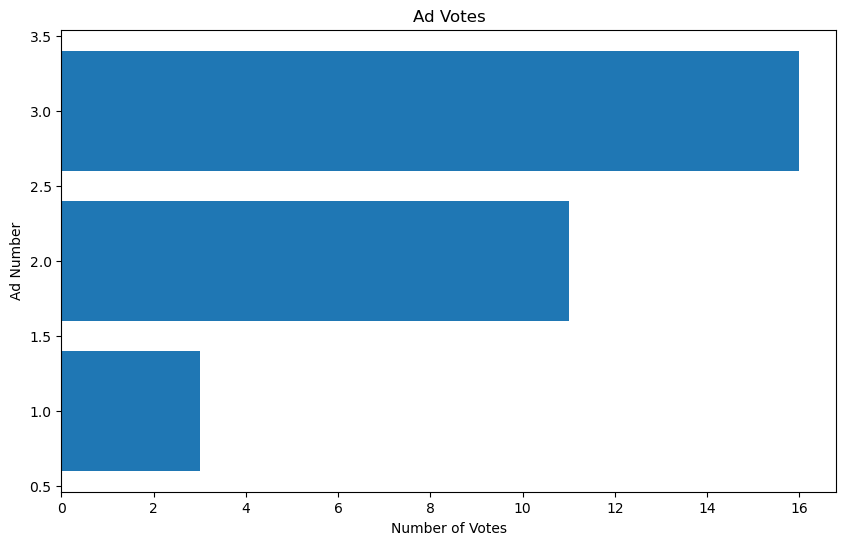

In [19]:
# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(list(votes.keys()), list(votes.values()))
# Add labels and title
plt.xlabel('Number of Votes')
plt.ylabel('Ad Number')
plt.title('Ad Votes')
# Show the plot
plt.show()


Finally, we pick the winner ad.

In [20]:
# picks the most voted ad
winner = max(votes, key=votes.get)
winner

3